# Exercice 2 - Les villes

Importer la base des villes villes.xls

Les noms de variables et les observations contiennent des espaces inutiles (exemple : ‘MAJ’) : commencer par nettoyer l’ensemble des chaines de caractères (à la fois dans les noms de colonnes et dans les observations)

Trouver le nombre de codes INSEE différents (attention aux doublons)

Comment calculer rapidement la moyenne, le nombre et le maximum pour chaque variable numérique ? (une ligne de code)

Compter le nombre de villes dans chaque Region et en faire un dictionnaire où la clé est la région et la valeur le nombre de villes

Représenter les communes en utilisant

matplotlib (PAS NECESSAIRE POUR L'INSTANT mais scatter à utiliser en utilisant la longitude et la latitude)

une librairie de cartographie (ex : folium) (BONUS POUR l'instant, on abordera le sujet) (https://france-geojson.gregoiredavid.fr/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("villes.txt", "\t")
dataframe

,Nom Ville,MAJ,Code Postal,Code INSEE,Code Région,Latitude,Longitude,Eloignement
0,L'Abergement-Clémenciat,L ABERGEMENT CLEMENCIAT,1400,1001,82,46.150000,4.916667,1.46
1,L'Abergement-de-Varey,L ABERGEMENT DE VAREY,1640,1002,82,46.000000,5.416667,1
2,Amareins,AMAREINS,1090,1003,82,46.083333,4.8,1.85
3,Ambérieu-en-Bugey,AMBERIEU EN BUGEY,1500,1004,82,45.950000,5.35,0.8
4,Ambérieux-en-Dombes,AMBERIEUX EN DOMBES,1330,1005,82,46.000000,4.9,1.72
...,...,...,...,...,...,...,...,...
35244,Saint-Michel,SAINT MICHEL,9100,9271,0,43.135000,1.5025,NaN
35245,Lorp-Sentaraille,LORP SENTARAILLE,9190,9289,0,43.008888,1.119444,NaN
35246,Soueix-Rogalle,SOUEIX ROGALLE,9140,9299,0,42.893333,1.211388,NaN
35247,Soulan,SOULAN,9320,9301,0,42.913333,1.233055,NaN


In [3]:
dataframe.rename(columns=lambda x: x.strip(), inplace=True)
list(dataframe)

['Nom Ville',
 'MAJ',
 'Code Postal',
 'Code INSEE',
 'Code Région',
 'Latitude',
 'Longitude',
 'Eloignement']

In [4]:
list(dataframe['Code INSEE'].unique())

[1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1019,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1031,
 1032,
 1033,
 1034,
 1035,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1062,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1127,
 1128,
 1129,
 1130,
 1131,
 1133,
 1134,
 1136,
 1137,
 1138,
 1139,
 1140,
 1142,
 1143,
 1144,
 1145,
 1146,
 1147,
 1148,
 1149,
 1150,
 1151,
 1153,
 1154,

In [5]:
dataframe.describe()

,Code Postal,Code INSEE,Code Région,Latitude
count,35249.000000,35249.000000,35249.000000,35249.000000
mean,46291.014554,46186.992822,48.532497,46.998450
std,25418.598824,25411.240496,27.264257,2.206877
min,1000.000000,1001.000000,0.000000,41.391667
25%,24640.000000,24550.000000,24.000000,45.216667
50%,49150.000000,49074.000000,43.000000,47.450000
75%,66720.000000,66203.000000,72.000000,48.850000
max,95880.000000,95690.000000,94.000000,51.083333


In [6]:
dataframe.groupby('Code Région')[['Nom Ville']].size()

Code Région
0       86
11    4181
21    1462
22    1433
23    1342
24    1766
25    1774
26    1483
31    1494
41    1825
43    1104
52    1188
53    1243
54     830
72    5450
73    1535
74     837
82    2368
83     977
91    1871
93     662
94     338
dtype: int64

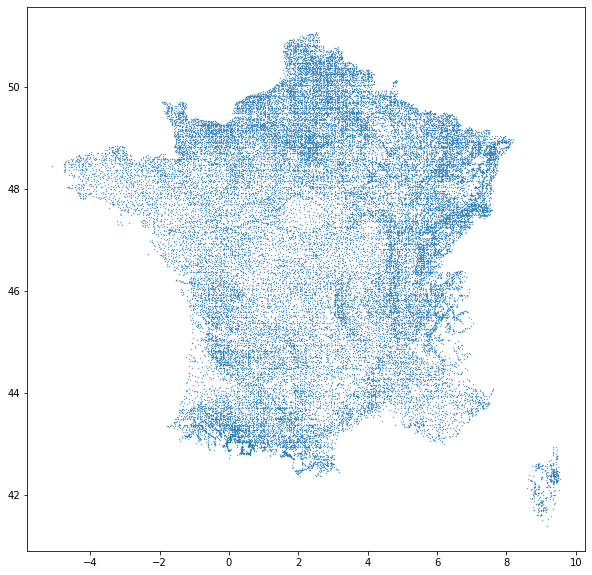

In [8]:
dataframe.Longitude = dataframe.Longitude.apply(lambda x: "0" if x.strip() == "-" else x).astype(float)
plt.figure(figsize=(10,10))
plt.scatter(dataframe.Longitude, dataframe.Latitude, s=0.1)